# Simple NLP with Movie Reviews

In [35]:
import pandas as pd
import nltk

In [46]:
df = pd.read_csv('movie_reviews.csv')
df.dropna(inplace=True) #Remove rows with Null values
df.head()

,Title,Rating,ReviewText
0,The Gray Man,2.5,Two hours hard to finish. Ryan Gosling could b...
1,The Gray Man,0.5,Awful. So freakin awful! No character developm...
2,The Gray Man,2.5,Very boring for a spy film. Had high hopes for...
3,The Gray Man,3.0,What let this movie down was the casting of th...
4,The Gray Man,3.0,This film is indeed quite stunning with strong...


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1165 entries, 0 to 1165
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       1165 non-null   object 
 1   Rating      1165 non-null   float64
 2   ReviewText  1165 non-null   object 
dtypes: float64(1), object(2)
memory usage: 36.4+ KB


In [48]:
#Create a new binary variable to classify ratings
df['RatingType'] = ['Bad' if rating <= 2.5
                   else 'Good' for rating in df['Rating']]

<AxesSubplot:ylabel='RatingType'>

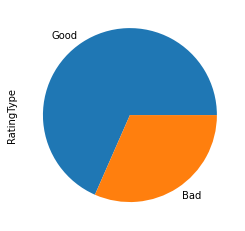

In [73]:
#Rating type distribution
df['RatingType'].value_counts().plot(kind='pie')

In [36]:
#Stopwords for our text preprocessing
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leave\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
from nltk.corpus import stopwords
import string

def text_processing(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [51]:
#Preprocessing Imports
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [75]:
#Model Imports
from sklearn.naive_bayes import MultinomialNB as NB
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import BaggingClassifier as BAG
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.linear_model import LogisticRegression as LR

In [53]:
#Metrics Imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

## Multinomial Naive Bayes

In [70]:
#Multinomial Naive Bayes
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', NB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

X = df['ReviewText']
y = df['RatingType']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=420)

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  2 101]
 [  0 247]]
              precision    recall  f1-score   support

         Bad       1.00      0.02      0.04       103
        Good       0.71      1.00      0.83       247

    accuracy                           0.71       350
   macro avg       0.85      0.51      0.43       350
weighted avg       0.80      0.71      0.60       350



## Basic Decision Tree

In [56]:
#Decision Tree
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', DT(max_depth=None)),  # train on TF-IDF vectors w/ Decision Tree classifier
])

X = df['ReviewText']
y = df['RatingType']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=420)

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 42  61]
 [ 67 180]]
              precision    recall  f1-score   support

         Bad       0.39      0.41      0.40       103
        Good       0.75      0.73      0.74       247

    accuracy                           0.63       350
   macro avg       0.57      0.57      0.57       350
weighted avg       0.64      0.63      0.64       350



## Bagging (Tree Ensemble)

In [57]:
#Bagging Ensemble
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', BAG(n_estimators=20)),  # train on TF-IDF vectors w/ Bagging Ensemble classifier
])

X = df['ReviewText']
y = df['RatingType']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=420)

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 50  53]
 [ 39 208]]
              precision    recall  f1-score   support

         Bad       0.56      0.49      0.52       103
        Good       0.80      0.84      0.82       247

    accuracy                           0.74       350
   macro avg       0.68      0.66      0.67       350
weighted avg       0.73      0.74      0.73       350



## Random Forest

In [68]:
#Random Forest Ensemble
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RF(n_estimators=25)),  # train on TF-IDF vectors w/ Random Forest Ensemble classifier
])

X = df['ReviewText']
y = df['RatingType']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=420)

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 31  72]
 [ 16 231]]
              precision    recall  f1-score   support

         Bad       0.66      0.30      0.41       103
        Good       0.76      0.94      0.84       247

    accuracy                           0.75       350
   macro avg       0.71      0.62      0.63       350
weighted avg       0.73      0.75      0.71       350



## Logistic Regression

In [66]:
#Logistic Regression
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer='word')),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LR()),  # train on TF-IDF vectors w/ Logistic Regression 
])

X = df['ReviewText']
y = df['RatingType']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=420)

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 23  80]
 [  5 242]]
              precision    recall  f1-score   support

         Bad       0.82      0.22      0.35       103
        Good       0.75      0.98      0.85       247

    accuracy                           0.76       350
   macro avg       0.79      0.60      0.60       350
weighted avg       0.77      0.76      0.70       350



# Comparing the Models

In [77]:
results = {'Models':['Multinomial NB','Basic Decision Tree','Bagging','Random Forest','Logistic Regression'],
          'Accuracy':[0.71,0.63,0.74,0.75,0.76],
           'Bad F1-Score':[0.04,0.4,0.52,0.41,0.35],
           'Good F1-Score': [0.83,0.74,0.82,0.84,0.85]}

results_df = pd.DataFrame.from_dict(results)

In [78]:
results_df

,Models,Accuracy,Bad F1-Score,Good F1-Score
0,Multinomial NB,0.71,0.04,0.83
1,Basic Decision Tree,0.63,0.40,0.74
2,Bagging,0.74,0.52,0.82
3,Random Forest,0.75,0.41,0.84
4,Logistic Regression,0.76,0.35,0.85


The model with the highest accuracy ended up being the Logistic Regression model. Although this model has the highest accuracy, we might prefer to use the bagging model since this model has better F1-Scores for both of our target classes.